In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/shull/Documents/2023/istdsa/project01/MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv').drop(columns=['routes', 'payment_method', 'transfers'])
df

,transit_timestamp,station_complex_id,station_complex,borough,ridership,latitude,longitude,Georeference
0,06/18/2023 07:00:00 PM,H023,DeKalb Av (L),BK,232,40.703810,-73.918430,POINT (-73.91843 40.70381)
1,06/18/2023 11:00:00 AM,C014,Prospect Av (R),BK,180,40.665413,-73.992874,POINT (-73.992874 40.665413)
2,01/24/2023 10:00:00 PM,R252,103 St (6),M,86,40.790600,-73.947480,POINT (-73.94748 40.7906)
3,09/05/2022 11:00:00 AM,R252,103 St (6),M,205,40.790600,-73.947480,POINT (-73.94748 40.7906)
4,05/08/2022 10:00:00 PM,R170,103 St (1),M,133,40.799446,-73.968376,POINT (-73.968376 40.799446)
...,...,...,...,...,...,...,...,...
5015193,03/15/2023 05:00:00 PM,R419,Zerega Av (6),BX,98,40.836487,-73.847040,POINT (-73.84704 40.836487)
5015194,04/25/2023 12:00:00 AM,R419,Zerega Av (6),BX,1,40.836487,-73.847040,POINT (-73.84704 40.836487)
5015195,05/12/2023 01:00:00 PM,R419,Zerega Av (6),BX,50,40.836487,-73.847040,POINT (-73.84704 40.836487)
5015196,06/04/2023 05:00:00 AM,R419,Zerega Av (6),BX,31,40.836487,-73.847040,POINT (-73.84704 40.836487)


In [3]:
weekdays = np.array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [4]:
hours = np.array(['12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM'])

In [5]:
df['transit_timestamp_1'] = df['transit_timestamp']

In [6]:
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'], format='%m/%d/%Y %I:%M:%S %p')

In [7]:
tt_col = df.pop('transit_timestamp')
df.insert(6, 'timestamp', tt_col)

In [8]:
tt1_col = df.pop('transit_timestamp_1')
df.insert(0, 'transit_timestamp', tt1_col)

In [9]:
df['hour'] = df['timestamp'].dt.hour
df['day_name'] = df['timestamp'].dt.day_name()
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month

In [10]:
df.borough = df.borough.str.strip()
df.station_complex = df.station_complex.str.strip()

In [11]:
borough_dict = {
    'BK': 'Brooklyn',
    'M': 'Manhattan',
    'Q': 'Queens',
    'BX': 'The Bronx'
}

In [12]:
df['borough'] = df.borough.map(borough_dict)

In [13]:
df.ridership.describe().astype(int)

count    5015198
mean         295
std          625
min            1
25%           33
50%          119
75%          316
max        24845
Name: ridership, dtype: int64

In [14]:
def ridership_level(number):
    if number > 20000:
        return 'High'
    elif number > 5000:
        return 'Medium'
    elif number > 0:
        return 'Low'
    else:
        return 'Never'

In [15]:
df['ridership_level'] = df.ridership.apply(ridership_level)

In [16]:
rdlvl_col = df.pop('ridership_level')
df.insert(5, 'ridership_level', rdlvl_col)

In [17]:
df = df[(df['timestamp'] > '2023-01-01 00:00:00') & (df['timestamp'] < '2023-07-01 00:00:00')]
df = df.reset_index()
df = df.drop(columns='index')
df

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,06/18/2023 07:00:00 PM,H023,DeKalb Av (L),Brooklyn,232,Low,40.703810,-73.918430,2023-06-18 19:00:00,POINT (-73.91843 40.70381),19,Sunday,6,18,6
1,06/18/2023 11:00:00 AM,C014,Prospect Av (R),Brooklyn,180,Low,40.665413,-73.992874,2023-06-18 11:00:00,POINT (-73.992874 40.665413),11,Sunday,6,18,6
2,01/24/2023 10:00:00 PM,R252,103 St (6),Manhattan,86,Low,40.790600,-73.947480,2023-01-24 22:00:00,POINT (-73.94748 40.7906),22,Tuesday,1,24,1
3,01/28/2023 06:00:00 PM,H007,1 Av (L),Manhattan,1450,Low,40.730953,-73.981630,2023-01-28 18:00:00,POINT (-73.98163 40.730953),18,Saturday,5,28,1
4,02/10/2023 08:00:00 AM,R170,103 St (1),Manhattan,849,Low,40.799446,-73.968376,2023-02-10 08:00:00,POINT (-73.968376 40.799446),8,Friday,4,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691175,03/15/2023 05:00:00 PM,R419,Zerega Av (6),The Bronx,98,Low,40.836487,-73.847040,2023-03-15 17:00:00,POINT (-73.84704 40.836487),17,Wednesday,2,15,3
1691176,04/25/2023 12:00:00 AM,R419,Zerega Av (6),The Bronx,1,Low,40.836487,-73.847040,2023-04-25 00:00:00,POINT (-73.84704 40.836487),0,Tuesday,1,25,4
1691177,05/12/2023 01:00:00 PM,R419,Zerega Av (6),The Bronx,50,Low,40.836487,-73.847040,2023-05-12 13:00:00,POINT (-73.84704 40.836487),13,Friday,4,12,5
1691178,06/04/2023 05:00:00 AM,R419,Zerega Av (6),The Bronx,31,Low,40.836487,-73.847040,2023-06-04 05:00:00,POINT (-73.84704 40.836487),5,Sunday,6,4,6


In [18]:
df.duplicated().sum()

0

In [19]:
df.isnull().sum()

transit_timestamp     0
station_complex_id    0
station_complex       0
borough               0
ridership             0
ridership_level       0
latitude              0
longitude             0
timestamp             0
Georeference          0
hour                  0
day_name              0
day_of_week           0
day                   0
month                 0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691180 entries, 0 to 1691179
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   transit_timestamp   object        
 1   station_complex_id  object        
 2   station_complex     object        
 3   borough             object        
 4   ridership           int64         
 5   ridership_level     object        
 6   latitude            float64       
 7   longitude           float64       
 8   timestamp           datetime64[ns]
 9   Georeference        object        
 10  hour                int64         
 11  day_name            object        
 12  day_of_week         int64         
 13  day                 int64         
 14  month               int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(7)
memory usage: 193.5+ MB


# ------------------------------------------------------------------------------------------

In [21]:
ridership_by_borough = pd.DataFrame(df.groupby('borough')['ridership'].sum().astype(int))
ridership_by_borough

,ridership
borough,
Brooklyn,123405408
Manhattan,292307203
Queens,80165108
The Bronx,40017820


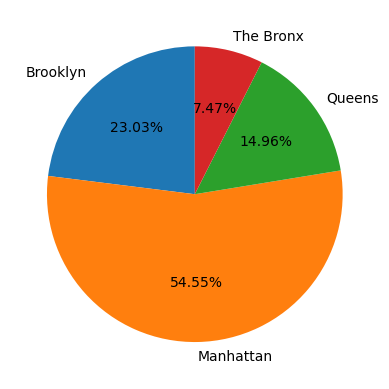

In [22]:
plt.pie(ridership_by_borough.ridership, labels=ridership_by_borough.index, autopct='%1.2f%%', startangle=90);

# ------------------------------------------------------------------------------------------

# High Ridership

In [23]:
high_ridership = df[df.ridership_level == 'High']
medium_ridership = df[df.ridership_level == 'Medium']
low_ridership = df[df.ridership_level == 'Low']
no_ridership = df[df.ridership_level == 'Never']

In [24]:
high_ridership = high_ridership.sort_values('ridership', ascending=False)
high_ridership = high_ridership.reset_index()
high_ridership = high_ridership.drop(columns='index')
high_ridership

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,06/13/2023 05:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24845,High,40.75731,-73.981964,2023-06-13 17:00:00,POINT (-73.981964 40.75731),17,Tuesday,1,13,6
1,05/03/2023 05:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24559,High,40.75731,-73.981964,2023-05-03 17:00:00,POINT (-73.981964 40.75731),17,Wednesday,2,3,5
2,06/14/2023 05:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24390,High,40.75731,-73.981964,2023-06-14 17:00:00,POINT (-73.981964 40.75731),17,Wednesday,2,14,6
3,06/06/2023 05:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24336,High,40.75731,-73.981964,2023-06-06 17:00:00,POINT (-73.981964 40.75731),17,Tuesday,1,6,6
4,05/17/2023 05:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24107,High,40.75731,-73.981964,2023-05-17 17:00:00,POINT (-73.981964 40.75731),17,Wednesday,2,17,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,01/26/2023 05:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,20170,High,40.75731,-73.981964,2023-01-26 17:00:00,POINT (-73.981964 40.75731),17,Thursday,3,26,1
60,03/14/2023 05:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,20140,High,40.75731,-73.981964,2023-03-14 17:00:00,POINT (-73.981964 40.75731),17,Tuesday,1,14,3
61,02/02/2023 05:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,20118,High,40.75731,-73.981964,2023-02-02 17:00:00,POINT (-73.981964 40.75731),17,Thursday,3,2,2
62,02/09/2023 05:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,20116,High,40.75731,-73.981964,2023-02-09 17:00:00,POINT (-73.981964 40.75731),17,Thursday,3,9,2


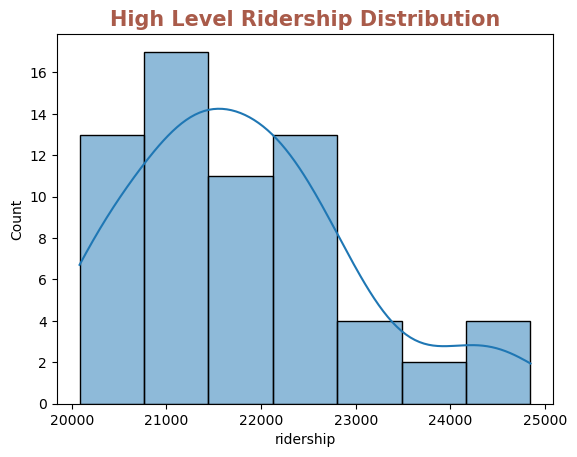

In [25]:
plt.title('High Level Ridership Distribution', fontsize = 15, color='#A95B4A', weight='bold')
sns.histplot(high_ridership.ridership, kde=True, bins=7);

In [26]:
high_ridership.station_complex.unique()

array(['Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)'],
      dtype=object)

## Times Square-42 St

In [27]:
times_sq = df[df.station_complex == 'Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)']
times_sq = times_sq.sort_values(by='ridership', ascending=False)
times_sq = times_sq.reset_index()
times_sq = times_sq.drop(columns='index')
times_sq

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,06/13/2023 05:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24845,High,40.75731,-73.981964,2023-06-13 17:00:00,POINT (-73.981964 40.75731),17,Tuesday,1,13,6
1,05/03/2023 05:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24559,High,40.75731,-73.981964,2023-05-03 17:00:00,POINT (-73.981964 40.75731),17,Wednesday,2,3,5
2,06/14/2023 05:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24390,High,40.75731,-73.981964,2023-06-14 17:00:00,POINT (-73.981964 40.75731),17,Wednesday,2,14,6
3,06/06/2023 05:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24336,High,40.75731,-73.981964,2023-06-06 17:00:00,POINT (-73.981964 40.75731),17,Tuesday,1,6,6
4,05/17/2023 05:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24107,High,40.75731,-73.981964,2023-05-17 17:00:00,POINT (-73.981964 40.75731),17,Wednesday,2,17,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,02/06/2023 03:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,144,Low,40.75731,-73.981964,2023-02-06 03:00:00,POINT (-73.981964 40.75731),3,Monday,0,6,2
4075,01/10/2023 03:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,141,Low,40.75731,-73.981964,2023-01-10 03:00:00,POINT (-73.981964 40.75731),3,Tuesday,1,10,1
4076,01/03/2023 03:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,141,Low,40.75731,-73.981964,2023-01-03 03:00:00,POINT (-73.981964 40.75731),3,Tuesday,1,3,1
4077,01/23/2023 03:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,134,Low,40.75731,-73.981964,2023-01-23 03:00:00,POINT (-73.981964 40.75731),3,Monday,0,23,1


In [28]:
times_sq_sorted = times_sq.sort_values(['month', 'day', 'hour'])
times_sq_sorted = times_sq_sorted.reset_index()
times_sq_sorted = times_sq_sorted.drop(columns='index')
times_sq_sorted

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,01/01/2023 01:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,6609,Medium,40.75731,-73.981964,2023-01-01 01:00:00,POINT (-73.981964 40.75731),1,Sunday,6,1,1
1,01/01/2023 02:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,3910,Low,40.75731,-73.981964,2023-01-01 02:00:00,POINT (-73.981964 40.75731),2,Sunday,6,1,1
2,01/01/2023 03:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,1799,Low,40.75731,-73.981964,2023-01-01 03:00:00,POINT (-73.981964 40.75731),3,Sunday,6,1,1
3,01/01/2023 04:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,989,Low,40.75731,-73.981964,2023-01-01 04:00:00,POINT (-73.981964 40.75731),4,Sunday,6,1,1
4,01/01/2023 05:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,564,Low,40.75731,-73.981964,2023-01-01 05:00:00,POINT (-73.981964 40.75731),5,Sunday,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,06/19/2023 08:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,6202,Medium,40.75731,-73.981964,2023-06-19 20:00:00,POINT (-73.981964 40.75731),20,Monday,0,19,6
4075,06/19/2023 09:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,5787,Medium,40.75731,-73.981964,2023-06-19 21:00:00,POINT (-73.981964 40.75731),21,Monday,0,19,6
4076,06/19/2023 10:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,6754,Medium,40.75731,-73.981964,2023-06-19 22:00:00,POINT (-73.981964 40.75731),22,Monday,0,19,6
4077,06/19/2023 11:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,3238,Low,40.75731,-73.981964,2023-06-19 23:00:00,POINT (-73.981964 40.75731),23,Monday,0,19,6


In [29]:
times_sq_day_of_week = pd.DataFrame(times_sq.groupby('day_of_week')['ridership'].mean().astype(int))
times_sq_day_of_week

,ridership
day_of_week,
0,5627
1,6979
2,7235
3,7016
4,6202
5,4539
6,3673


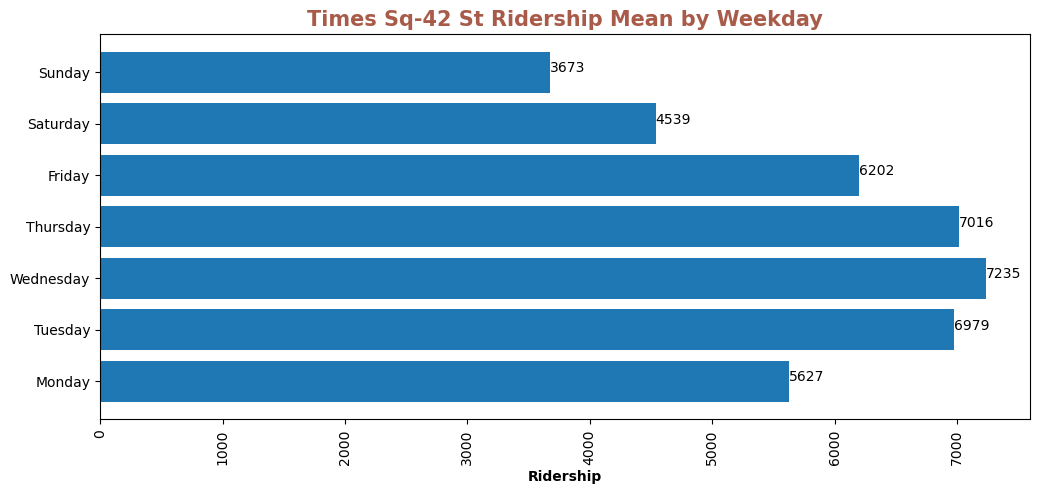

In [30]:
plt.figure(figsize = [12,5])
plt.title('Times Sq-42 St Ridership Mean by Weekday', fontsize = 15, color='#A95B4A', weight='bold')
plt.xlabel('Ridership', weight='bold')
plt.xticks(rotation=90, ha='center');
plt.barh(weekdays, times_sq_day_of_week.ridership)
for index, value in enumerate(times_sq_day_of_week.ridership):
    plt.text(value, index, str(value))

In [31]:
# Tuesday, Wednesday, Thursday

In [32]:
june_13th_times_sq = times_sq[(times_sq.month == 6) & (times_sq.day == 13)]
june_13th_times_sq = june_13th_times_sq.sort_values('hour')
june_13th_times_sq = june_13th_times_sq.reset_index()
june_13th_times_sq = june_13th_times_sq.drop(columns='index')
june_13th_times_sq

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,06/13/2023 12:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,1774,Low,40.75731,-73.981964,2023-06-13 00:00:00,POINT (-73.981964 40.75731),0,Tuesday,1,13,6
1,06/13/2023 01:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,618,Low,40.75731,-73.981964,2023-06-13 01:00:00,POINT (-73.981964 40.75731),1,Tuesday,1,13,6
2,06/13/2023 02:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,297,Low,40.75731,-73.981964,2023-06-13 02:00:00,POINT (-73.981964 40.75731),2,Tuesday,1,13,6
3,06/13/2023 03:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,246,Low,40.75731,-73.981964,2023-06-13 03:00:00,POINT (-73.981964 40.75731),3,Tuesday,1,13,6
4,06/13/2023 04:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,281,Low,40.75731,-73.981964,2023-06-13 04:00:00,POINT (-73.981964 40.75731),4,Tuesday,1,13,6
5,06/13/2023 05:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,2407,Low,40.75731,-73.981964,2023-06-13 05:00:00,POINT (-73.981964 40.75731),5,Tuesday,1,13,6
6,06/13/2023 06:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,6502,Medium,40.75731,-73.981964,2023-06-13 06:00:00,POINT (-73.981964 40.75731),6,Tuesday,1,13,6
7,06/13/2023 07:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,9819,Medium,40.75731,-73.981964,2023-06-13 07:00:00,POINT (-73.981964 40.75731),7,Tuesday,1,13,6
8,06/13/2023 08:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,12837,Medium,40.75731,-73.981964,2023-06-13 08:00:00,POINT (-73.981964 40.75731),8,Tuesday,1,13,6
9,06/13/2023 09:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,9698,Medium,40.75731,-73.981964,2023-06-13 09:00:00,POINT (-73.981964 40.75731),9,Tuesday,1,13,6


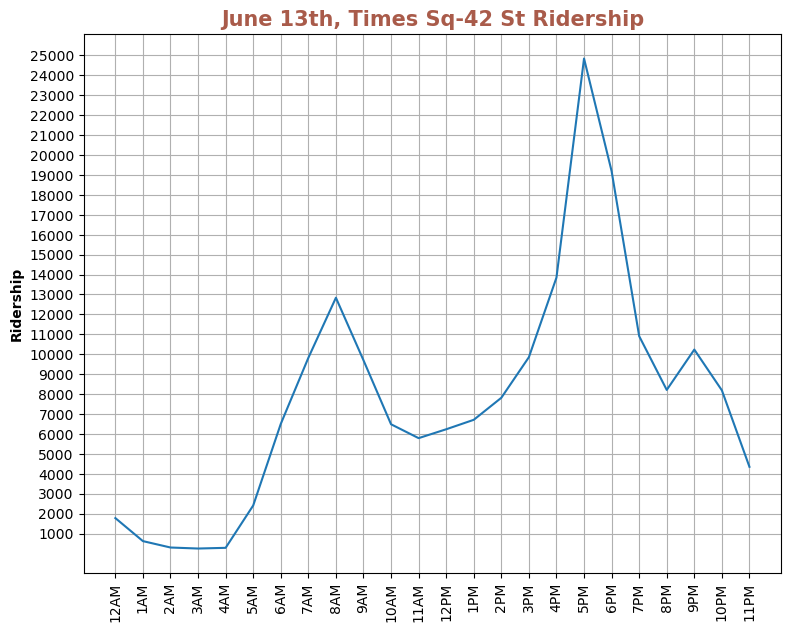

In [33]:
plt.figure(figsize = [9,7])
plt.plot(hours, june_13th_times_sq.ridership)
plt.title('June 13th, Times Sq-42 St Ridership', fontsize = 15, color='#A95B4A', weight='bold');
plt.ylabel('Ridership', weight='bold')
plt.grid()
plt.xticks(rotation=90, ha='center')
ticks_y = np.linspace(1000, 25000,25)
plt.yticks(ticks_y);

In [34]:
june_6th_times_sq = times_sq[(times_sq.month == 6) & (times_sq.day == 6)]
june_6th_times_sq = june_6th_times_sq.sort_values('hour')
june_6th_times_sq = june_6th_times_sq.reset_index()
june_6th_times_sq = june_6th_times_sq.drop(columns='index')
june_6th_times_sq

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,06/06/2023 12:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,2076,Low,40.75731,-73.981964,2023-06-06 00:00:00,POINT (-73.981964 40.75731),0,Tuesday,1,6,6
1,06/06/2023 01:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,704,Low,40.75731,-73.981964,2023-06-06 01:00:00,POINT (-73.981964 40.75731),1,Tuesday,1,6,6
2,06/06/2023 02:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,357,Low,40.75731,-73.981964,2023-06-06 02:00:00,POINT (-73.981964 40.75731),2,Tuesday,1,6,6
3,06/06/2023 03:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,233,Low,40.75731,-73.981964,2023-06-06 03:00:00,POINT (-73.981964 40.75731),3,Tuesday,1,6,6
4,06/06/2023 04:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,314,Low,40.75731,-73.981964,2023-06-06 04:00:00,POINT (-73.981964 40.75731),4,Tuesday,1,6,6
5,06/06/2023 05:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,2395,Low,40.75731,-73.981964,2023-06-06 05:00:00,POINT (-73.981964 40.75731),5,Tuesday,1,6,6
6,06/06/2023 06:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,6326,Medium,40.75731,-73.981964,2023-06-06 06:00:00,POINT (-73.981964 40.75731),6,Tuesday,1,6,6
7,06/06/2023 07:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,10089,Medium,40.75731,-73.981964,2023-06-06 07:00:00,POINT (-73.981964 40.75731),7,Tuesday,1,6,6
8,06/06/2023 08:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,12854,Medium,40.75731,-73.981964,2023-06-06 08:00:00,POINT (-73.981964 40.75731),8,Tuesday,1,6,6
9,06/06/2023 09:00:00 AM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,10440,Medium,40.75731,-73.981964,2023-06-06 09:00:00,POINT (-73.981964 40.75731),9,Tuesday,1,6,6


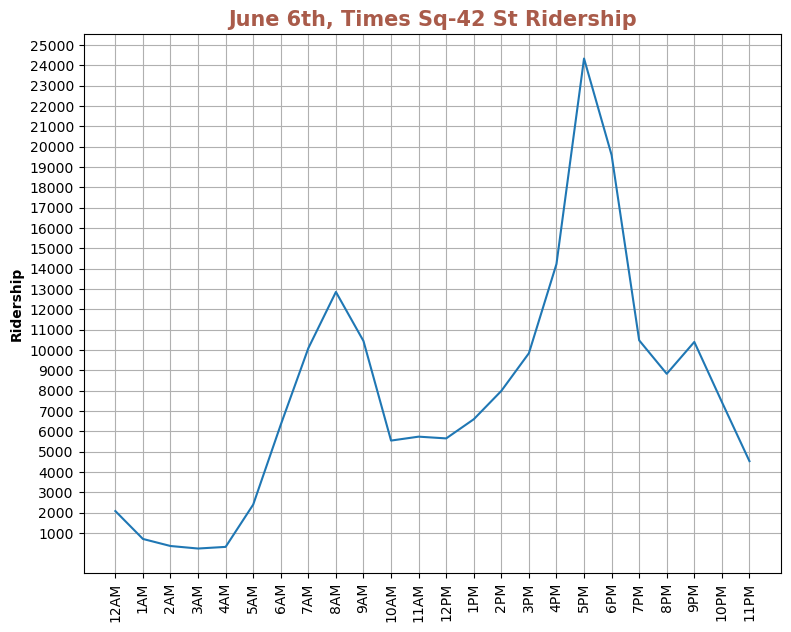

In [35]:
plt.figure(figsize = [9,7])
plt.plot(hours, june_6th_times_sq.ridership)
plt.title('June 6th, Times Sq-42 St Ridership', fontsize = 15, color='#A95B4A', weight='bold');
plt.ylabel('Ridership', weight='bold')
plt.grid()
plt.xticks(rotation=90, ha='center')
ticks_y = np.linspace(1000, 25000,25)
plt.yticks(ticks_y);

In [36]:
# 8AM, 3PM, 4PM, 5PM, 6PM, 7PM

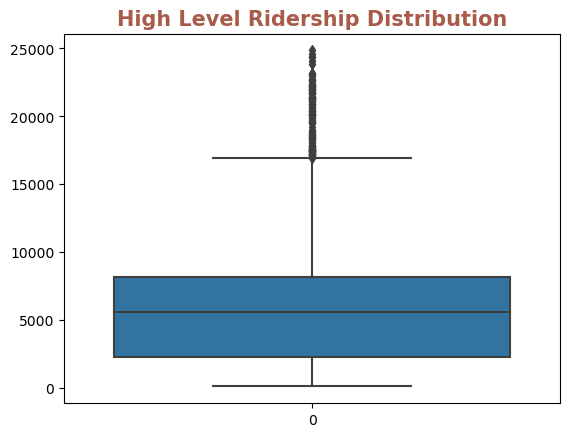

In [37]:
plt.title('High Level Ridership Distribution', fontsize = 15, color='#A95B4A', weight='bold')
sns.boxplot(times_sq.ridership);

# ------------------------------------------------------------------------------------------

# Medium Ridership

In [38]:
medium_ridership = medium_ridership.sort_values('ridership', ascending=False)
medium_ridership = medium_ridership.reset_index()
medium_ridership = medium_ridership.drop(columns='index')
medium_ridership

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,06/12/2023 05:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,19951,Medium,40.757310,-73.981964,2023-06-12 17:00:00,POINT (-73.981964 40.75731),17,Monday,0,12,6
1,01/05/2023 05:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,19889,Medium,40.757310,-73.981964,2023-01-05 17:00:00,POINT (-73.981964 40.75731),17,Thursday,3,5,1
2,03/30/2023 05:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,19727,Medium,40.757310,-73.981964,2023-03-30 17:00:00,POINT (-73.981964 40.75731),17,Thursday,3,30,3
3,03/23/2023 05:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,19623,Medium,40.757310,-73.981964,2023-03-23 17:00:00,POINT (-73.981964 40.75731),17,Thursday,3,23,3
4,06/06/2023 06:00:00 PM,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,19588,Medium,40.757310,-73.981964,2023-06-06 18:00:00,POINT (-73.981964 40.75731),18,Tuesday,1,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,02/23/2023 05:00:00 PM,N070,"34 St-Penn Station (A,C,E)",Manhattan,5003,Medium,40.752290,-73.993390,2023-02-23 17:00:00,POINT (-73.99339 40.75229),17,Thursday,3,23,2
5917,04/10/2023 09:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,5002,Medium,40.751778,-73.976845,2023-04-10 09:00:00,POINT (-73.976845 40.751778),9,Monday,0,10,4
5918,06/14/2023 04:00:00 PM,N049,"59 St-Columbus Circle (A,B,C,D,1)",Manhattan,5001,Medium,40.768295,-73.981735,2023-06-14 16:00:00,POINT (-73.981735 40.768295),16,Wednesday,2,14,6
5919,05/01/2023 07:00:00 AM,R135,"34 St-Penn Station (1,2,3)",Manhattan,5001,Medium,40.750374,-73.991060,2023-05-01 07:00:00,POINT (-73.99106 40.750374),7,Monday,0,1,5


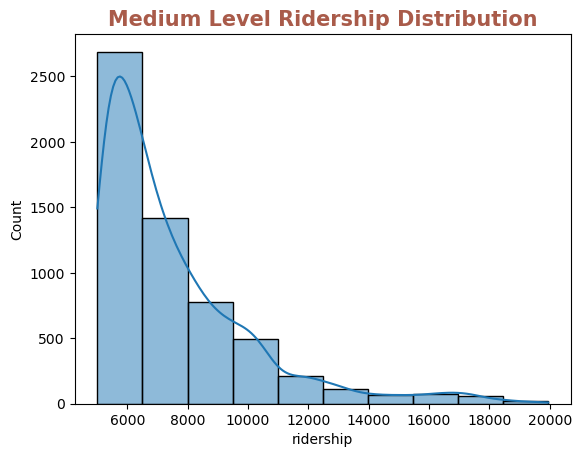

In [39]:
plt.title('Medium Level Ridership Distribution', fontsize = 15, color='#A95B4A', weight='bold')
sns.histplot(medium_ridership.ridership, kde=True, bins=10);

In [40]:
medium_ridership.station_complex.unique()

array(['Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)',
       'Grand Central-42 St (S,4,5,6,7)', 'Fulton St (A,C,J,Z,2,3,4,5)',
       '34 St-Herald Sq (B,D,F,M,N,Q,R,W)',
       '161 St-Yankee Stadium (B,D,4)',
       '47-50 Sts-Rockefeller Center (B,D,F,M)',
       'Chambers St (A,C)/WTC (E)/Park Pl (2,3)/Cortlandt (R,W)',
       '14 St-Union Sq (L,N,Q,R,W,4,5,6)', 'Mets-Willets Point (7)',
       '34 St-Penn Station (1,2,3)', '34 St-Penn Station (A,C,E)',
       'Lexington Av-53 St (E,M)/51 St (6)',
       '59 St-Columbus Circle (A,B,C,D,1)',
       'Lexington Av (N,R,W)/59 St (4,5,6)',
       'Atlantic Av-Barclays Ctr (B,D,N,Q,R,2,3,4,5)',
       'Coney Island-Stillwell Av (D,F,N,Q)', 'Flushing-Main St (7)',
       '74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)',
       'Canal St (J,N,Q,R,W,Z,6)', '5 Av-53 St (E,M)'], dtype=object)

## Grand Central-42 St

In [41]:
grand_central = df[df.station_complex == 'Grand Central-42 St (S,4,5,6,7)']
grand_central = grand_central.sort_values(by='ridership', ascending=False)
grand_central = grand_central.reset_index()
grand_central = grand_central.drop(columns='index')
grand_central

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,06/13/2023 05:00:00 PM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,18873,Medium,40.751778,-73.976845,2023-06-13 17:00:00,POINT (-73.976845 40.751778),17,Tuesday,1,13,6
1,06/14/2023 05:00:00 PM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,18363,Medium,40.751778,-73.976845,2023-06-14 17:00:00,POINT (-73.976845 40.751778),17,Wednesday,2,14,6
2,06/06/2023 05:00:00 PM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,18152,Medium,40.751778,-73.976845,2023-06-06 17:00:00,POINT (-73.976845 40.751778),17,Tuesday,1,6,6
3,02/14/2023 05:00:00 PM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,17830,Medium,40.751778,-73.976845,2023-02-14 17:00:00,POINT (-73.976845 40.751778),17,Tuesday,1,14,2
4,05/23/2023 05:00:00 PM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,17769,Medium,40.751778,-73.976845,2023-05-23 17:00:00,POINT (-73.976845 40.751778),17,Tuesday,1,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,01/09/2023 03:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,18,Low,40.751778,-73.976845,2023-01-09 03:00:00,POINT (-73.976845 40.751778),3,Monday,0,9,1
4075,02/06/2023 03:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,17,Low,40.751778,-73.976845,2023-02-06 03:00:00,POINT (-73.976845 40.751778),3,Monday,0,6,2
4076,01/30/2023 03:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,17,Low,40.751778,-73.976845,2023-01-30 03:00:00,POINT (-73.976845 40.751778),3,Monday,0,30,1
4077,03/27/2023 03:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,16,Low,40.751778,-73.976845,2023-03-27 03:00:00,POINT (-73.976845 40.751778),3,Monday,0,27,3


In [42]:
grand_central_sorted = grand_central.sort_values(['month', 'day', 'hour'])
grand_central_sorted = grand_central_sorted.reset_index()
grand_central_sorted = grand_central_sorted.drop(columns='index')
grand_central_sorted

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,01/01/2023 01:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,1220,Low,40.751778,-73.976845,2023-01-01 01:00:00,POINT (-73.976845 40.751778),1,Sunday,6,1,1
1,01/01/2023 02:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,695,Low,40.751778,-73.976845,2023-01-01 02:00:00,POINT (-73.976845 40.751778),2,Sunday,6,1,1
2,01/01/2023 03:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,444,Low,40.751778,-73.976845,2023-01-01 03:00:00,POINT (-73.976845 40.751778),3,Sunday,6,1,1
3,01/01/2023 04:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,164,Low,40.751778,-73.976845,2023-01-01 04:00:00,POINT (-73.976845 40.751778),4,Sunday,6,1,1
4,01/01/2023 05:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,103,Low,40.751778,-73.976845,2023-01-01 05:00:00,POINT (-73.976845 40.751778),5,Sunday,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,06/19/2023 08:00:00 PM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,3196,Low,40.751778,-73.976845,2023-06-19 20:00:00,POINT (-73.976845 40.751778),20,Monday,0,19,6
4075,06/19/2023 09:00:00 PM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,2703,Low,40.751778,-73.976845,2023-06-19 21:00:00,POINT (-73.976845 40.751778),21,Monday,0,19,6
4076,06/19/2023 10:00:00 PM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,2256,Low,40.751778,-73.976845,2023-06-19 22:00:00,POINT (-73.976845 40.751778),22,Monday,0,19,6
4077,06/19/2023 11:00:00 PM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,1320,Low,40.751778,-73.976845,2023-06-19 23:00:00,POINT (-73.976845 40.751778),23,Monday,0,19,6


In [43]:
grand_central_day_of_week = pd.DataFrame(grand_central.groupby('day_of_week')['ridership'].mean().astype(int))
grand_central_day_of_week

,ridership
day_of_week,
0,3366
1,4296
2,4402
3,4248
4,3363
5,2015
6,1635


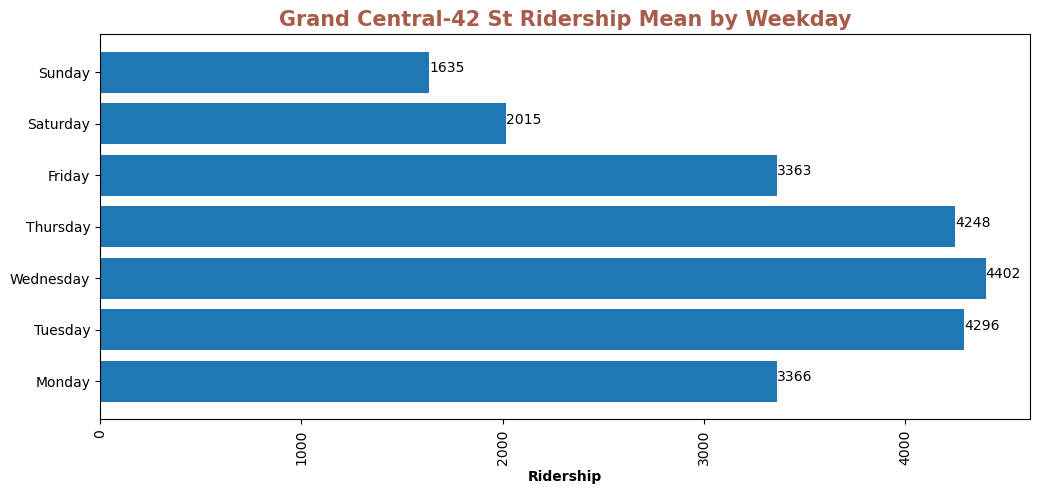

In [44]:
plt.figure(figsize = [12,5])
plt.title('Grand Central-42 St Ridership Mean by Weekday', fontsize = 15, color='#A95B4A', weight='bold')
plt.xlabel('Ridership', weight='bold')
plt.xticks(rotation=90, ha='center');
plt.barh(weekdays, grand_central_day_of_week.ridership)
for index, value in enumerate(grand_central_day_of_week.ridership):
    plt.text(value, index, str(value))

In [45]:
# Tuesday, Wednesday, Thursday

In [46]:
june_13th_grand_central = grand_central[(grand_central.month == 6) & (grand_central.day == 13)]
june_13th_grand_central = june_13th_grand_central.sort_values('hour')
june_13th_grand_central = june_13th_grand_central.reset_index()
june_13th_grand_central = june_13th_grand_central.drop(columns='index')
june_13th_grand_central

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,06/13/2023 12:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,781,Low,40.751778,-73.976845,2023-06-13 00:00:00,POINT (-73.976845 40.751778),0,Tuesday,1,13,6
1,06/13/2023 01:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,207,Low,40.751778,-73.976845,2023-06-13 01:00:00,POINT (-73.976845 40.751778),1,Tuesday,1,13,6
2,06/13/2023 02:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,75,Low,40.751778,-73.976845,2023-06-13 02:00:00,POINT (-73.976845 40.751778),2,Tuesday,1,13,6
3,06/13/2023 03:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,36,Low,40.751778,-73.976845,2023-06-13 03:00:00,POINT (-73.976845 40.751778),3,Tuesday,1,13,6
4,06/13/2023 04:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,58,Low,40.751778,-73.976845,2023-06-13 04:00:00,POINT (-73.976845 40.751778),4,Tuesday,1,13,6
5,06/13/2023 05:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,708,Low,40.751778,-73.976845,2023-06-13 05:00:00,POINT (-73.976845 40.751778),5,Tuesday,1,13,6
6,06/13/2023 06:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,2554,Low,40.751778,-73.976845,2023-06-13 06:00:00,POINT (-73.976845 40.751778),6,Tuesday,1,13,6
7,06/13/2023 07:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,6961,Medium,40.751778,-73.976845,2023-06-13 07:00:00,POINT (-73.976845 40.751778),7,Tuesday,1,13,6
8,06/13/2023 08:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,10811,Medium,40.751778,-73.976845,2023-06-13 08:00:00,POINT (-73.976845 40.751778),8,Tuesday,1,13,6
9,06/13/2023 09:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,6558,Medium,40.751778,-73.976845,2023-06-13 09:00:00,POINT (-73.976845 40.751778),9,Tuesday,1,13,6


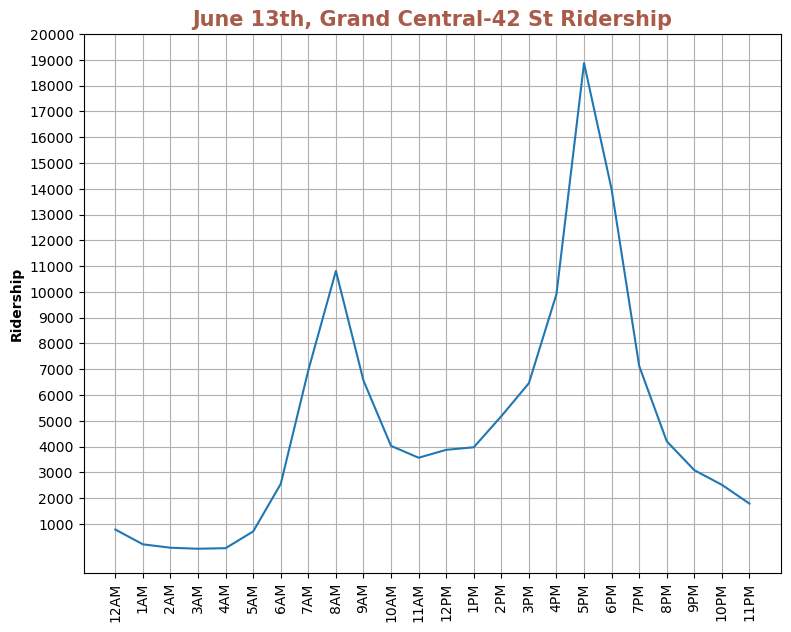

In [47]:
plt.figure(figsize = [9,7])
plt.plot(hours, june_13th_grand_central.ridership)
plt.title('June 13th, Grand Central-42 St Ridership', fontsize = 15, color='#A95B4A', weight='bold');
plt.ylabel('Ridership', weight='bold')
plt.grid()
plt.xticks(rotation=90, ha='center')
ticks_y = np.linspace(1000, 20000,20)
plt.yticks(ticks_y);

In [48]:
june_6th_grand_central = grand_central[(grand_central.month == 6) & (grand_central.day == 6)]
june_6th_grand_central = june_6th_grand_central.sort_values('hour')
june_6th_grand_central = june_6th_grand_central.reset_index()
june_6th_grand_central = june_6th_grand_central.drop(columns='index')
june_6th_grand_central

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,06/06/2023 12:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,908,Low,40.751778,-73.976845,2023-06-06 00:00:00,POINT (-73.976845 40.751778),0,Tuesday,1,6,6
1,06/06/2023 01:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,236,Low,40.751778,-73.976845,2023-06-06 01:00:00,POINT (-73.976845 40.751778),1,Tuesday,1,6,6
2,06/06/2023 02:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,103,Low,40.751778,-73.976845,2023-06-06 02:00:00,POINT (-73.976845 40.751778),2,Tuesday,1,6,6
3,06/06/2023 03:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,33,Low,40.751778,-73.976845,2023-06-06 03:00:00,POINT (-73.976845 40.751778),3,Tuesday,1,6,6
4,06/06/2023 04:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,64,Low,40.751778,-73.976845,2023-06-06 04:00:00,POINT (-73.976845 40.751778),4,Tuesday,1,6,6
5,06/06/2023 05:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,674,Low,40.751778,-73.976845,2023-06-06 05:00:00,POINT (-73.976845 40.751778),5,Tuesday,1,6,6
6,06/06/2023 06:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,2546,Low,40.751778,-73.976845,2023-06-06 06:00:00,POINT (-73.976845 40.751778),6,Tuesday,1,6,6
7,06/06/2023 07:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,6814,Medium,40.751778,-73.976845,2023-06-06 07:00:00,POINT (-73.976845 40.751778),7,Tuesday,1,6,6
8,06/06/2023 08:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,10747,Medium,40.751778,-73.976845,2023-06-06 08:00:00,POINT (-73.976845 40.751778),8,Tuesday,1,6,6
9,06/06/2023 09:00:00 AM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,7589,Medium,40.751778,-73.976845,2023-06-06 09:00:00,POINT (-73.976845 40.751778),9,Tuesday,1,6,6


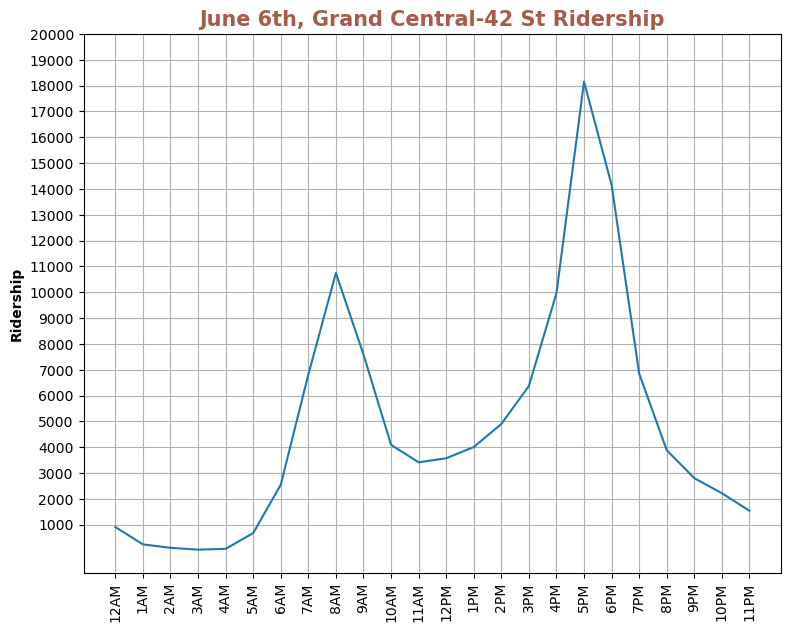

In [49]:
plt.figure(figsize = [9,7])
plt.plot(hours, june_6th_grand_central.ridership)
plt.title('June 6th, Grand Central-42 St Ridership', fontsize = 15, color='#A95B4A', weight='bold');
plt.ylabel('Ridership', weight='bold')
plt.grid()
plt.xticks(rotation=90, ha='center')
ticks_y = np.linspace(1000, 20000,20)
plt.yticks(ticks_y);

In [50]:
# 8AM, 3PM, 4PM, 5PM, 6PM, 7PM

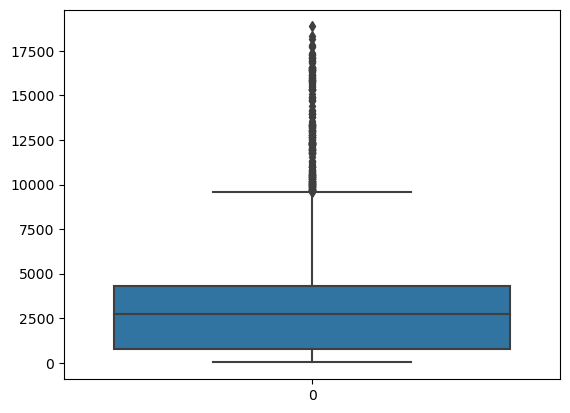

In [51]:
sns.boxplot(data=grand_central.ridership);

## Fulton St

In [52]:
fulton = df[df.station_complex == 'Fulton St (A,C,J,Z,2,3,4,5)']
fulton = fulton.sort_values(by='ridership', ascending=False)
fulton = fulton.reset_index()
fulton = fulton.drop(columns='index')
fulton

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,06/06/2023 05:00:00 PM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,12214,Medium,40.710373,-74.00657,2023-06-06 17:00:00,POINT (-74.00657 40.710373),17,Tuesday,1,6,6
1,06/13/2023 05:00:00 PM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,11893,Medium,40.710373,-74.00657,2023-06-13 17:00:00,POINT (-74.00657 40.710373),17,Tuesday,1,13,6
2,05/03/2023 05:00:00 PM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,11744,Medium,40.710373,-74.00657,2023-05-03 17:00:00,POINT (-74.00657 40.710373),17,Wednesday,2,3,5
3,05/16/2023 05:00:00 PM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,11651,Medium,40.710373,-74.00657,2023-05-16 17:00:00,POINT (-74.00657 40.710373),17,Tuesday,1,16,5
4,05/24/2023 05:00:00 PM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,11628,Medium,40.710373,-74.00657,2023-05-24 17:00:00,POINT (-74.00657 40.710373),17,Wednesday,2,24,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,03/14/2023 03:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,18,Low,40.710373,-74.00657,2023-03-14 03:00:00,POINT (-74.00657 40.710373),3,Tuesday,1,14,3
4075,01/03/2023 03:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,18,Low,40.710373,-74.00657,2023-01-03 03:00:00,POINT (-74.00657 40.710373),3,Tuesday,1,3,1
4076,02/27/2023 03:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,18,Low,40.710373,-74.00657,2023-02-27 03:00:00,POINT (-74.00657 40.710373),3,Monday,0,27,2
4077,01/09/2023 03:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,14,Low,40.710373,-74.00657,2023-01-09 03:00:00,POINT (-74.00657 40.710373),3,Monday,0,9,1


In [53]:
fulton_sorted = fulton.sort_values(['month', 'day', 'hour'])
fulton_sorted = fulton_sorted.reset_index()
fulton_sorted = fulton_sorted.drop(columns='index')
fulton_sorted

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,01/01/2023 01:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,979,Low,40.710373,-74.00657,2023-01-01 01:00:00,POINT (-74.00657 40.710373),1,Sunday,6,1,1
1,01/01/2023 02:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,575,Low,40.710373,-74.00657,2023-01-01 02:00:00,POINT (-74.00657 40.710373),2,Sunday,6,1,1
2,01/01/2023 03:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,240,Low,40.710373,-74.00657,2023-01-01 03:00:00,POINT (-74.00657 40.710373),3,Sunday,6,1,1
3,01/01/2023 04:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,122,Low,40.710373,-74.00657,2023-01-01 04:00:00,POINT (-74.00657 40.710373),4,Sunday,6,1,1
4,01/01/2023 05:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,75,Low,40.710373,-74.00657,2023-01-01 05:00:00,POINT (-74.00657 40.710373),5,Sunday,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,06/19/2023 08:00:00 PM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,1686,Low,40.710373,-74.00657,2023-06-19 20:00:00,POINT (-74.00657 40.710373),20,Monday,0,19,6
4075,06/19/2023 09:00:00 PM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,1350,Low,40.710373,-74.00657,2023-06-19 21:00:00,POINT (-74.00657 40.710373),21,Monday,0,19,6
4076,06/19/2023 10:00:00 PM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,973,Low,40.710373,-74.00657,2023-06-19 22:00:00,POINT (-74.00657 40.710373),22,Monday,0,19,6
4077,06/19/2023 11:00:00 PM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,667,Low,40.710373,-74.00657,2023-06-19 23:00:00,POINT (-74.00657 40.710373),23,Monday,0,19,6


In [54]:
fulton_day_of_week = pd.DataFrame(fulton.groupby('day_of_week')['ridership'].mean().astype(int))
fulton_day_of_week

,ridership
day_of_week,
0,1937
1,2477
2,2542
3,2482
4,2075
5,1262
6,1002


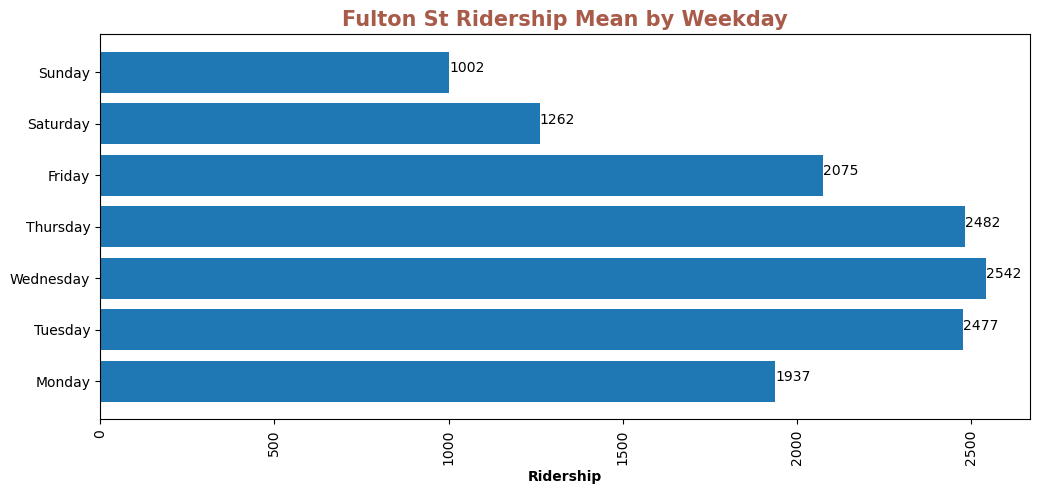

In [55]:
plt.figure(figsize = [12,5])
plt.title('Fulton St Ridership Mean by Weekday', fontsize = 15, color='#A95B4A', weight='bold')
plt.xlabel('Ridership', weight='bold')
plt.xticks(rotation=90, ha='center');
plt.barh(weekdays, fulton_day_of_week.ridership)
for index, value in enumerate(fulton_day_of_week.ridership):
    plt.text(value, index, str(value))

In [56]:
# Tuesday, Wednesday, Thursday

In [57]:
june_6th_fulton = fulton[(fulton.month == 6) & (fulton.day == 6)]
june_6th_fulton = june_6th_fulton.sort_values('hour')
june_6th_fulton = june_6th_fulton.reset_index()
june_6th_fulton = june_6th_fulton.drop(columns='index')
june_6th_fulton

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,06/06/2023 12:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,439,Low,40.710373,-74.00657,2023-06-06 00:00:00,POINT (-74.00657 40.710373),0,Tuesday,1,6,6
1,06/06/2023 01:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,114,Low,40.710373,-74.00657,2023-06-06 01:00:00,POINT (-74.00657 40.710373),1,Tuesday,1,6,6
2,06/06/2023 02:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,45,Low,40.710373,-74.00657,2023-06-06 02:00:00,POINT (-74.00657 40.710373),2,Tuesday,1,6,6
3,06/06/2023 03:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,44,Low,40.710373,-74.00657,2023-06-06 03:00:00,POINT (-74.00657 40.710373),3,Tuesday,1,6,6
4,06/06/2023 04:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,42,Low,40.710373,-74.00657,2023-06-06 04:00:00,POINT (-74.00657 40.710373),4,Tuesday,1,6,6
5,06/06/2023 05:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,359,Low,40.710373,-74.00657,2023-06-06 05:00:00,POINT (-74.00657 40.710373),5,Tuesday,1,6,6
6,06/06/2023 06:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,1220,Low,40.710373,-74.00657,2023-06-06 06:00:00,POINT (-74.00657 40.710373),6,Tuesday,1,6,6
7,06/06/2023 07:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,2736,Low,40.710373,-74.00657,2023-06-06 07:00:00,POINT (-74.00657 40.710373),7,Tuesday,1,6,6
8,06/06/2023 08:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,4621,Low,40.710373,-74.00657,2023-06-06 08:00:00,POINT (-74.00657 40.710373),8,Tuesday,1,6,6
9,06/06/2023 09:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,3107,Low,40.710373,-74.00657,2023-06-06 09:00:00,POINT (-74.00657 40.710373),9,Tuesday,1,6,6


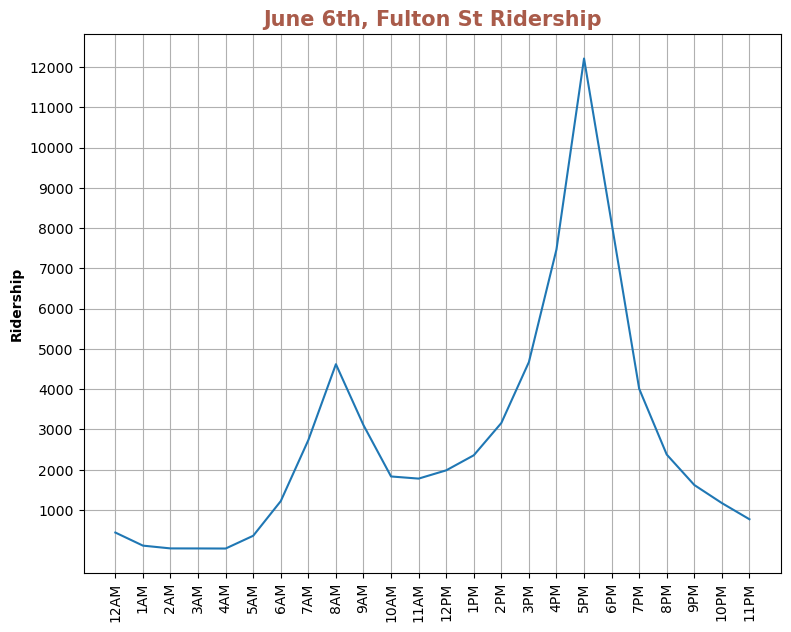

In [58]:
plt.figure(figsize = [9,7])
plt.plot(hours, june_6th_fulton.ridership)
plt.title('June 6th, Fulton St Ridership', fontsize = 15, color='#A95B4A', weight='bold');
plt.ylabel('Ridership', weight='bold')
plt.grid()
plt.xticks(rotation=90, ha='center')
ticks_y = np.linspace(1000, 12000,12)
plt.yticks(ticks_y);

In [59]:
june_13th_fulton = fulton[(fulton.month == 6) & (fulton.day == 13)]
june_13th_fulton = june_13th_fulton.sort_values('hour')
june_13th_fulton = june_13th_fulton.reset_index()
june_13th_fulton = june_13th_fulton.drop(columns='index')
june_13th_fulton

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,06/13/2023 12:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,339,Low,40.710373,-74.00657,2023-06-13 00:00:00,POINT (-74.00657 40.710373),0,Tuesday,1,13,6
1,06/13/2023 01:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,104,Low,40.710373,-74.00657,2023-06-13 01:00:00,POINT (-74.00657 40.710373),1,Tuesday,1,13,6
2,06/13/2023 02:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,41,Low,40.710373,-74.00657,2023-06-13 02:00:00,POINT (-74.00657 40.710373),2,Tuesday,1,13,6
3,06/13/2023 03:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,32,Low,40.710373,-74.00657,2023-06-13 03:00:00,POINT (-74.00657 40.710373),3,Tuesday,1,13,6
4,06/13/2023 04:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,73,Low,40.710373,-74.00657,2023-06-13 04:00:00,POINT (-74.00657 40.710373),4,Tuesday,1,13,6
5,06/13/2023 05:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,206,Low,40.710373,-74.00657,2023-06-13 05:00:00,POINT (-74.00657 40.710373),5,Tuesday,1,13,6
6,06/13/2023 06:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,1192,Low,40.710373,-74.00657,2023-06-13 06:00:00,POINT (-74.00657 40.710373),6,Tuesday,1,13,6
7,06/13/2023 07:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,2686,Low,40.710373,-74.00657,2023-06-13 07:00:00,POINT (-74.00657 40.710373),7,Tuesday,1,13,6
8,06/13/2023 08:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,4716,Low,40.710373,-74.00657,2023-06-13 08:00:00,POINT (-74.00657 40.710373),8,Tuesday,1,13,6
9,06/13/2023 09:00:00 AM,N095,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,2984,Low,40.710373,-74.00657,2023-06-13 09:00:00,POINT (-74.00657 40.710373),9,Tuesday,1,13,6


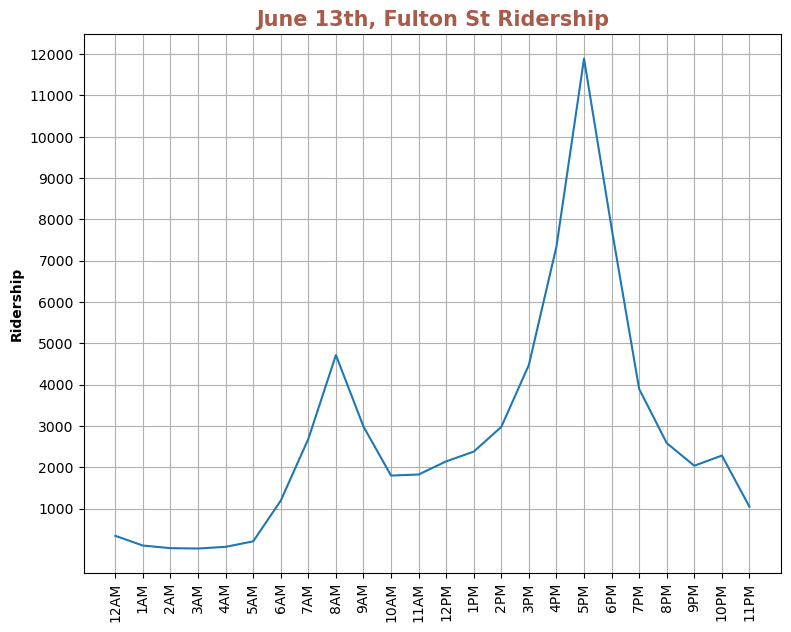

In [60]:
plt.figure(figsize = [9,7])
plt.plot(hours, june_13th_fulton.ridership)
plt.title('June 13th, Fulton St Ridership', fontsize = 15, color='#A95B4A', weight='bold');
plt.ylabel('Ridership', weight='bold')
plt.grid()
plt.xticks(rotation=90, ha='center')
ticks_y = np.linspace(1000, 12000,12)
plt.yticks(ticks_y);

In [61]:
# 8AM, 3PM, 4PM, 5PM, 6PM, 7PM

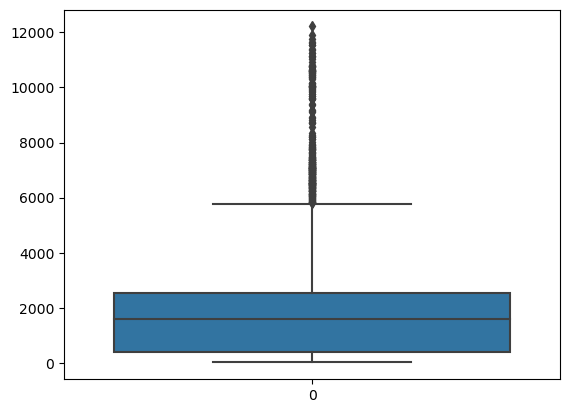

In [62]:
sns.boxplot(data=fulton.ridership);

# ------------------------------------------------------------------------------------------

## 34 St-Herald Sq (B,D,F,M,N,Q,R,W)

In [63]:
herald_sq = df[df.station_complex == '34 St-Herald Sq (B,D,F,M,N,Q,R,W)']
herald_sq = herald_sq.sort_values(by='ridership', ascending=False)
herald_sq = herald_sq.reset_index()
herald_sq = herald_sq.drop(columns='index')
herald_sq

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,06/06/2023 05:00:00 PM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,11877,Medium,40.749718,-73.98782,2023-06-06 17:00:00,POINT (-73.98782 40.749718),17,Tuesday,1,6,6
1,05/23/2023 05:00:00 PM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,11848,Medium,40.749718,-73.98782,2023-05-23 17:00:00,POINT (-73.98782 40.749718),17,Tuesday,1,23,5
2,05/03/2023 05:00:00 PM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,11684,Medium,40.749718,-73.98782,2023-05-03 17:00:00,POINT (-73.98782 40.749718),17,Wednesday,2,3,5
3,05/24/2023 05:00:00 PM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,11523,Medium,40.749718,-73.98782,2023-05-24 17:00:00,POINT (-73.98782 40.749718),17,Wednesday,2,24,5
4,06/13/2023 05:00:00 PM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,11484,Medium,40.749718,-73.98782,2023-06-13 17:00:00,POINT (-73.98782 40.749718),17,Tuesday,1,13,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,04/18/2023 03:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,43,Low,40.749718,-73.98782,2023-04-18 03:00:00,POINT (-73.98782 40.749718),3,Tuesday,1,18,4
4075,04/10/2023 03:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,39,Low,40.749718,-73.98782,2023-04-10 03:00:00,POINT (-73.98782 40.749718),3,Monday,0,10,4
4076,02/28/2023 03:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,39,Low,40.749718,-73.98782,2023-02-28 03:00:00,POINT (-73.98782 40.749718),3,Tuesday,1,28,2
4077,05/30/2023 03:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,38,Low,40.749718,-73.98782,2023-05-30 03:00:00,POINT (-73.98782 40.749718),3,Tuesday,1,30,5


In [64]:
herald_sq_sorted = herald_sq.sort_values(['month', 'day', 'hour'])
herald_sq_sorted = herald_sq_sorted.reset_index()
herald_sq_sorted = herald_sq_sorted.drop(columns='index')
herald_sq_sorted

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,01/01/2023 01:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,3036,Low,40.749718,-73.98782,2023-01-01 01:00:00,POINT (-73.98782 40.749718),1,Sunday,6,1,1
1,01/01/2023 02:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,1459,Low,40.749718,-73.98782,2023-01-01 02:00:00,POINT (-73.98782 40.749718),2,Sunday,6,1,1
2,01/01/2023 03:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,780,Low,40.749718,-73.98782,2023-01-01 03:00:00,POINT (-73.98782 40.749718),3,Sunday,6,1,1
3,01/01/2023 04:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,391,Low,40.749718,-73.98782,2023-01-01 04:00:00,POINT (-73.98782 40.749718),4,Sunday,6,1,1
4,01/01/2023 05:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,227,Low,40.749718,-73.98782,2023-01-01 05:00:00,POINT (-73.98782 40.749718),5,Sunday,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,06/19/2023 08:00:00 PM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,3504,Low,40.749718,-73.98782,2023-06-19 20:00:00,POINT (-73.98782 40.749718),20,Monday,0,19,6
4075,06/19/2023 09:00:00 PM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,2695,Low,40.749718,-73.98782,2023-06-19 21:00:00,POINT (-73.98782 40.749718),21,Monday,0,19,6
4076,06/19/2023 10:00:00 PM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,1915,Low,40.749718,-73.98782,2023-06-19 22:00:00,POINT (-73.98782 40.749718),22,Monday,0,19,6
4077,06/19/2023 11:00:00 PM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,1063,Low,40.749718,-73.98782,2023-06-19 23:00:00,POINT (-73.98782 40.749718),23,Monday,0,19,6


In [65]:
herald_sq_day_of_week = pd.DataFrame(herald_sq.groupby('day_of_week')['ridership'].mean().astype(int))
herald_sq_day_of_week

,ridership
day_of_week,
0,2595
1,3072
2,3112
3,3104
4,2849
5,2071
6,1697


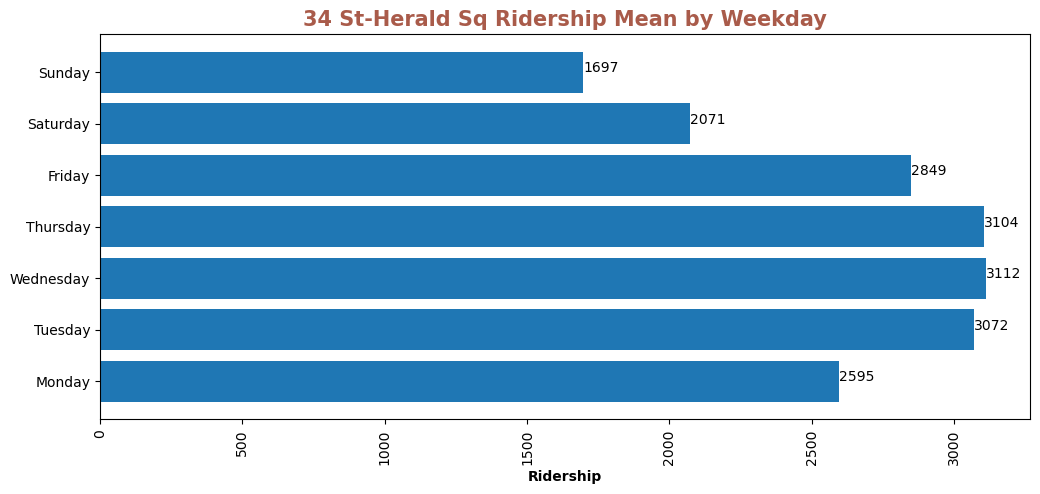

In [66]:
plt.figure(figsize = [12,5])
plt.title('34 St-Herald Sq Ridership Mean by Weekday', fontsize = 15, color='#A95B4A', weight='bold')
plt.xlabel('Ridership', weight='bold')
plt.xticks(rotation=90, ha='center');
plt.barh(weekdays, herald_sq_day_of_week.ridership)
for index, value in enumerate(herald_sq_day_of_week.ridership):
    plt.text(value, index, str(value))

In [67]:
# Tuesday, Wednesday, Thursday

In [68]:
june_6th_herald_sq = herald_sq[(herald_sq.month == 6) & (herald_sq.day == 6)]
june_6th_herald_sq = june_6th_herald_sq.sort_values('hour')
june_6th_herald_sq = june_6th_herald_sq.reset_index()
june_6th_herald_sq = june_6th_herald_sq.drop(columns='index')
june_6th_herald_sq

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,06/06/2023 12:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,626,Low,40.749718,-73.98782,2023-06-06 00:00:00,POINT (-73.98782 40.749718),0,Tuesday,1,6,6
1,06/06/2023 01:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,193,Low,40.749718,-73.98782,2023-06-06 01:00:00,POINT (-73.98782 40.749718),1,Tuesday,1,6,6
2,06/06/2023 02:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,98,Low,40.749718,-73.98782,2023-06-06 02:00:00,POINT (-73.98782 40.749718),2,Tuesday,1,6,6
3,06/06/2023 03:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,69,Low,40.749718,-73.98782,2023-06-06 03:00:00,POINT (-73.98782 40.749718),3,Tuesday,1,6,6
4,06/06/2023 04:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,79,Low,40.749718,-73.98782,2023-06-06 04:00:00,POINT (-73.98782 40.749718),4,Tuesday,1,6,6
5,06/06/2023 05:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,334,Low,40.749718,-73.98782,2023-06-06 05:00:00,POINT (-73.98782 40.749718),5,Tuesday,1,6,6
6,06/06/2023 06:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,1330,Low,40.749718,-73.98782,2023-06-06 06:00:00,POINT (-73.98782 40.749718),6,Tuesday,1,6,6
7,06/06/2023 07:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,3022,Low,40.749718,-73.98782,2023-06-06 07:00:00,POINT (-73.98782 40.749718),7,Tuesday,1,6,6
8,06/06/2023 08:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,4858,Low,40.749718,-73.98782,2023-06-06 08:00:00,POINT (-73.98782 40.749718),8,Tuesday,1,6,6
9,06/06/2023 09:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,4072,Low,40.749718,-73.98782,2023-06-06 09:00:00,POINT (-73.98782 40.749718),9,Tuesday,1,6,6


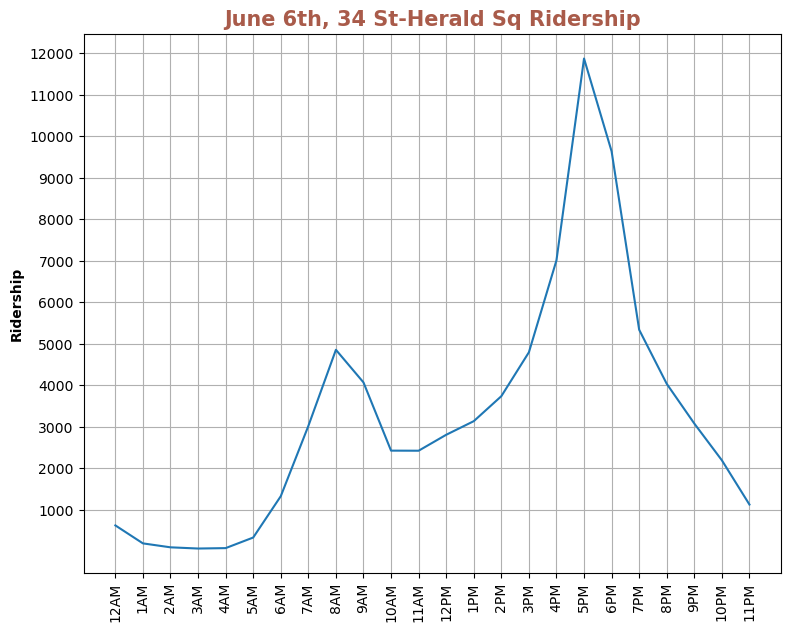

In [69]:
plt.figure(figsize = [9,7])
plt.plot(hours, june_6th_herald_sq.ridership)
plt.title('June 6th, 34 St-Herald Sq Ridership', fontsize = 15, color='#A95B4A', weight='bold');
plt.ylabel('Ridership', weight='bold')
plt.grid()
plt.xticks(rotation=90, ha='center')
ticks_y = np.linspace(1000, 12000,12)
plt.yticks(ticks_y);

In [70]:
june_13th_herald_sq = herald_sq[(herald_sq.month == 6) & (herald_sq.day == 13)]
june_13th_herald_sq = june_13th_herald_sq.sort_values('hour')
june_13th_herald_sq = june_13th_herald_sq.reset_index()
june_13th_herald_sq = june_13th_herald_sq.drop(columns='index')
june_13th_herald_sq

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,06/13/2023 12:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,546,Low,40.749718,-73.98782,2023-06-13 00:00:00,POINT (-73.98782 40.749718),0,Tuesday,1,13,6
1,06/13/2023 01:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,188,Low,40.749718,-73.98782,2023-06-13 01:00:00,POINT (-73.98782 40.749718),1,Tuesday,1,13,6
2,06/13/2023 02:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,79,Low,40.749718,-73.98782,2023-06-13 02:00:00,POINT (-73.98782 40.749718),2,Tuesday,1,13,6
3,06/13/2023 03:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,60,Low,40.749718,-73.98782,2023-06-13 03:00:00,POINT (-73.98782 40.749718),3,Tuesday,1,13,6
4,06/13/2023 04:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,90,Low,40.749718,-73.98782,2023-06-13 04:00:00,POINT (-73.98782 40.749718),4,Tuesday,1,13,6
5,06/13/2023 05:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,303,Low,40.749718,-73.98782,2023-06-13 05:00:00,POINT (-73.98782 40.749718),5,Tuesday,1,13,6
6,06/13/2023 06:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,1355,Low,40.749718,-73.98782,2023-06-13 06:00:00,POINT (-73.98782 40.749718),6,Tuesday,1,13,6
7,06/13/2023 07:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,2975,Low,40.749718,-73.98782,2023-06-13 07:00:00,POINT (-73.98782 40.749718),7,Tuesday,1,13,6
8,06/13/2023 08:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,4903,Low,40.749718,-73.98782,2023-06-13 08:00:00,POINT (-73.98782 40.749718),8,Tuesday,1,13,6
9,06/13/2023 09:00:00 AM,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,3908,Low,40.749718,-73.98782,2023-06-13 09:00:00,POINT (-73.98782 40.749718),9,Tuesday,1,13,6


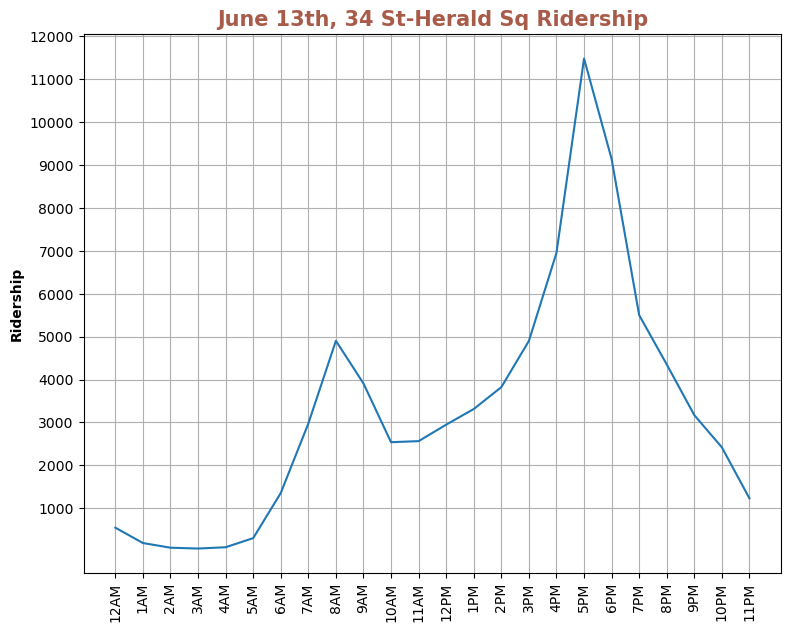

In [71]:
plt.figure(figsize = [9,7])
plt.plot(hours, june_13th_herald_sq.ridership)
plt.title('June 13th, 34 St-Herald Sq Ridership', fontsize = 15, color='#A95B4A', weight='bold');
plt.ylabel('Ridership', weight='bold')
plt.grid()
plt.xticks(rotation=90, ha='center')
ticks_y = np.linspace(1000, 12000,12)
plt.yticks(ticks_y);

In [72]:
# 8AM, 3PM, 4PM, 5PM, 6PM, 7PM

# ------------------------------------------------------------------------------------------

# Low Ridership

In [73]:
low_ridership = low_ridership.sort_values('ridership', ascending=False)
low_ridership = low_ridership.reset_index()
low_ridership = low_ridership.drop(columns='index')
low_ridership

,transit_timestamp,station_complex_id,station_complex,borough,ridership,ridership_level,latitude,longitude,timestamp,Georeference,hour,day_name,day_of_week,day,month
0,05/22/2023 04:00:00 PM,N094,"Chambers St (A,C)/WTC (E)/Park Pl (2,3)/Cortla...",Manhattan,5000,Low,40.714110,-74.008580,2023-05-22 16:00:00,POINT (-74.00858 40.71411),16,Monday,0,22,5
1,02/27/2023 07:00:00 PM,R238,"Grand Central-42 St (S,4,5,6,7)",Manhattan,5000,Low,40.751778,-73.976845,2023-02-27 19:00:00,POINT (-73.976845 40.751778),19,Monday,0,27,2
2,03/22/2023 06:00:00 PM,N049,"59 St-Columbus Circle (A,B,C,D,1)",Manhattan,5000,Low,40.768295,-73.981735,2023-03-22 18:00:00,POINT (-73.981735 40.768295),18,Wednesday,2,22,3
3,05/06/2023 04:00:00 PM,A034,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",Manhattan,4999,Low,40.735737,-73.989950,2023-05-06 16:00:00,POINT (-73.98995 40.735737),16,Saturday,5,6,5
4,03/01/2023 06:00:00 PM,N049,"59 St-Columbus Circle (A,B,C,D,1)",Manhattan,4999,Low,40.768295,-73.981735,2023-03-01 18:00:00,POINT (-73.981735 40.768295),18,Wednesday,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685190,02/06/2023 02:00:00 AM,N556,Avenue P (F),Brooklyn,1,Low,40.608944,-73.973020,2023-02-06 02:00:00,POINT (-73.97302 40.608944),2,Monday,0,6,2
1685191,05/31/2023 12:00:00 AM,E009,71 St (D),Brooklyn,1,Low,40.619590,-73.998860,2023-05-31 00:00:00,POINT (-73.99886 40.61959),0,Wednesday,2,31,5
1685192,06/17/2023 08:00:00 AM,N555,Avenue N (F),Brooklyn,1,Low,40.615140,-73.974200,2023-06-17 08:00:00,POINT (-73.9742 40.61514),8,Saturday,5,17,6
1685193,01/16/2023 01:00:00 AM,R630,Junius St (3),Brooklyn,1,Low,40.663513,-73.902450,2023-01-16 01:00:00,POINT (-73.90245 40.663513),1,Monday,0,16,1


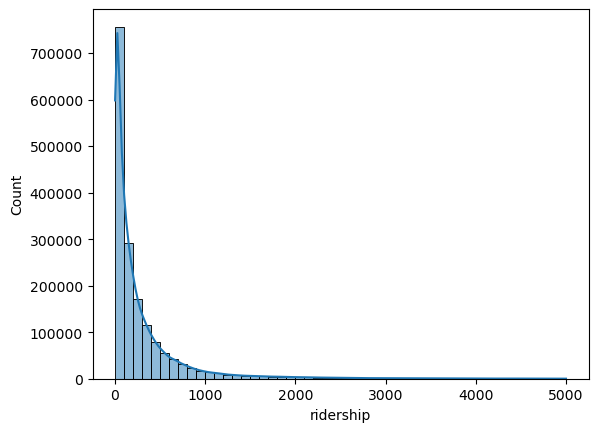

In [74]:
sns.histplot(low_ridership.ridership, kde=True, bins=50);

# ------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------

In [75]:
pd.DataFrame(df.groupby('station_complex').ridership.agg(['count', 'mean', 'max', 'sum']).astype(int)).sort_values('sum', ascending=False).head(10)

,count,mean,max,sum
station_complex,,,,
"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)",4079,5883,24845,23997128
"Grand Central-42 St (S,4,5,6,7)",4079,3323,18873,13558263
"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",4079,2638,11877,10760472
"14 St-Union Sq (L,N,Q,R,W,4,5,6)",4079,2414,8897,9848801
"Fulton St (A,C,J,Z,2,3,4,5)",4079,1963,12214,8008867
"34 St-Penn Station (A,C,E)",4079,1852,8662,7557804
"59 St-Columbus Circle (A,B,C,D,1)",4079,1773,7313,7233125
"34 St-Penn Station (1,2,3)",4079,1712,8679,6984234
"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)",4079,1550,5610,6322752


# ------------------------------------------------------------------------------------------

In [76]:
riderships = pd.DataFrame(times_sq_sorted.transit_timestamp)
riderships['times_sq'] = pd.DataFrame(times_sq_sorted.ridership)
riderships['grand_central'] = pd.DataFrame(grand_central_sorted.ridership)
riderships['fulton'] = pd.DataFrame(fulton_sorted.ridership)
riderships['herald_sq'] = pd.DataFrame(herald_sq_sorted.ridership)
riderships

,transit_timestamp,times_sq,grand_central,fulton,herald_sq
0,01/01/2023 01:00:00 AM,6609,1220,979,3036
1,01/01/2023 02:00:00 AM,3910,695,575,1459
2,01/01/2023 03:00:00 AM,1799,444,240,780
3,01/01/2023 04:00:00 AM,989,164,122,391
4,01/01/2023 05:00:00 AM,564,103,75,227
...,...,...,...,...,...
4074,06/19/2023 08:00:00 PM,6202,3196,1686,3504
4075,06/19/2023 09:00:00 PM,5787,2703,1350,2695
4076,06/19/2023 10:00:00 PM,6754,2256,973,1915
4077,06/19/2023 11:00:00 PM,3238,1320,667,1063


# ------------------------------------------------------------------------------------------

In [77]:
june_13th_riderships = pd.DataFrame(june_13th_times_sq.transit_timestamp)
june_13th_riderships['times_sq'] = pd.DataFrame(june_13th_times_sq.ridership)
june_13th_riderships['grand_central'] = pd.DataFrame(june_13th_grand_central.ridership)
june_13th_riderships['fulton'] = pd.DataFrame(june_13th_fulton.ridership)
june_13th_riderships['herald_sq'] = pd.DataFrame(june_13th_herald_sq.ridership)
june_13th_riderships

,transit_timestamp,times_sq,grand_central,fulton,herald_sq
0,06/13/2023 12:00:00 AM,1774,781,339,546
1,06/13/2023 01:00:00 AM,618,207,104,188
2,06/13/2023 02:00:00 AM,297,75,41,79
3,06/13/2023 03:00:00 AM,246,36,32,60
4,06/13/2023 04:00:00 AM,281,58,73,90
5,06/13/2023 05:00:00 AM,2407,708,206,303
6,06/13/2023 06:00:00 AM,6502,2554,1192,1355
7,06/13/2023 07:00:00 AM,9819,6961,2686,2975
8,06/13/2023 08:00:00 AM,12837,10811,4716,4903
9,06/13/2023 09:00:00 AM,9698,6558,2984,3908
